In [55]:
################ IMPORTING THE NECESSARY LIBRARIES ################


# Data Processing
import pandas as pd
import numpy as np


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

#Viz
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
################# READING DATA From 1999 to 2008 ################

df_1999 = pd.read_table('1999_tab.txt')
df_2000 = pd.read_table('2000_tab.txt')
df_2001 = pd.read_table('2001_tab.txt', encoding='ISO-8859-1')
df_2002 = pd.read_table('2002_tab.txt', encoding='ISO-8859-1')
df_2003 = pd.read_table('2003_tab.txt')
df_2004 = pd.read_table('2004_tab.txt')
df_2005 = pd.read_table('2005_tab.txt')
df_2006 = pd.read_table('2006_tab.txt')
df_2007 = pd.read_table('2007_tab.txt')
df_2008 = pd.read_table('2008_tab.txt')
df_planes= pd.read_csv('plane-data.csv')



In [3]:
df_planes.tail()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
5028,N999DN,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992


In [4]:
df_2003.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1,29,3,1651.0,1655,1912.0,1913,UA,1017,...,5,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2003,1,30,4,1654.0,1655,1910.0,1913,UA,1017,...,2,26,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2003,1,31,5,1724.0,1655,1936.0,1913,UA,1017,...,5,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2003,1,1,3,1033.0,1035,1625.0,1634,UA,1018,...,6,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2003,1,2,4,1053.0,1035,1726.0,1634,UA,1018,...,13,46,0,NaN,0,NaN,NaN,NaN,NaN,NaN




# Data Exploration EDA

Following is full description of the cols of the flights historical data:  
**Name  Description**  
1  **Year**  1987-2008  
2  **Month**  12-Jan  
3  **DayofMonth**  31-Jan  
4  **DayOfWeek**  1 (Monday) - 7 (Sunday)  
5  **DepTime**  actual departure time (local, hhmm)  
6	**CRSDepTime**	scheduled departure time (local, hhmm)  
7	**ArrTime**	actual arrival time (local, hhmm)  
8	**CRSArrTime**	scheduled arrival time (local, hhmm)  
9  **UniqueCarrier**  unique carrier code  
10  **FlightNum**  flight number  
11  **TailNum**  plane tail number  
12  **ActualElapsedTime**  in minutes  
13  **CRSElapsedTime**  in minutes  
14  **AirTime**  in minutes  
15  **ArrDelay**  arrival delay, in minutes  
16  **DepDelay**  departure delay, in minutes  
17  **Origin**  origin IATA airport code  
18  **Dest**  destination IATA airport code  
19  **Distance**  in miles  
20  **TaxiIn**  taxi in time, in minutes  
21  **TaxiOut**  taxi out time in minutes  
22  **Cancelled**  was the flight cancelled?  
23  **CancellationCode**  reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
24  **Diverted**  1 = yes, 0 = no  
25  **CarrierDelay**  in minutes  
26  **WeatherDelay**  in minutes  
27  **NASDelay**  in minutes  
28  **SecurityDelay**  in minutes  
29  **LateAircraftDelay**  in minutes  



In [5]:
# shape of the data
#print('The 2004 Historical Data shape: ', df_2004.shape )
print('The 2003 Historical Data shape: ', df_2003.shape )

The 2003 Historical Data shape:  (1048575, 29)


In [6]:
#exploring the cols types
df_2003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1048575 non-null  int64  
 1   Month              1048575 non-null  int64  
 2   DayofMonth         1048575 non-null  int64  
 3   DayOfWeek          1048575 non-null  int64  
 4   DepTime            1020326 non-null  float64
 5   CRSDepTime         1048575 non-null  int64  
 6   ArrTime            1018304 non-null  float64
 7   CRSArrTime         1048575 non-null  int64  
 8   UniqueCarrier      1048575 non-null  object 
 9   FlightNum          1048575 non-null  int64  
 10  TailNum            1032495 non-null  object 
 11  ActualElapsedTime  1018304 non-null  float64
 12  CRSElapsedTime     1048575 non-null  int64  
 13  AirTime            1018304 non-null  float64
 14  ArrDelay           1018304 non-null  float64
 15  DepDelay           1020326 non-n

**CONCLUSION**  
- The historical flights data have as shape around 7M of rows and 29 cols for 2003 and 2004 years.
- Data contains 5 categorical cols, and 24 numerical cols.

In [7]:
#Getting an overview of the numerical cols from 2003 data
df_2003.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1048575.0,2003.000000,0.000000,2003.0,2003.0,2003.0,2003.0,2003.0
Month,1048575.0,1.473467,0.499296,1.0,1.0,1.0,2.0,2.0
DayofMonth,1048575.0,15.385351,8.570519,1.0,8.0,15.0,23.0,31.0
DayOfWeek,1048575.0,3.934457,1.944746,1.0,2.0,4.0,5.0,7.0
DepTime,1020326.0,1349.067698,465.898891,1.0,943.0,1335.0,1731.0,2400.0
CRSDepTime,1048575.0,1344.258013,459.166413,0.0,940.0,1330.0,1725.0,2359.0
ArrTime,1018304.0,1509.036592,481.908725,1.0,1132.0,1532.0,1916.0,2400.0
CRSArrTime,1048575.0,1514.155956,470.828366,0.0,1135.0,1535.0,1914.0,2359.0
FlightNum,1048575.0,2045.700106,1919.791492,1.0,610.0,1460.0,2804.0,9766.0
ActualElapsedTime,1018304.0,122.206253,69.798859,-129.0,72.0,103.0,153.0,1572.0


For 2003, We note the presence of some negative variables: ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, NASDelay, NASDelay.  
- For ActualElapsedTime, CRSElapsedTime (duration in minutes), It's weird to have such values
- For the cols reflecting delays ArrDelay, DepDelay, NASDelay, NASDelay, it's normal to have such negative values reflecting when a flight departs or arrivals early.

In [8]:
#Getting an overview of the categorical cols from 2003 data
df_2003.describe(include=object).T

,count,unique,top,freq
UniqueCarrier,1048575,17,WN,155299
TailNum,1032495,4598,0,1866
Origin,1048575,268,ATL,59663
Dest,1048575,267,ATL,59666


For 2003, Most flights have as origin IATA airport and destination origin IATA airport ATL.

We supposed that time in the 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime','CRSDepTime','ArrTime', 'CRSArrTime' cols can be interpreted as such hhmm (as found in the variables description col). It needs to be 0000<hhmm<2400. Let's do some sanity check around it.

In [9]:
df_2003[['DepTime','CRSDepTime','ArrTime', 'CRSArrTime']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,DepTime,CRSDepTime,ArrTime,CRSArrTime
count,1020326.00000,1048575.00000,1018304.00000,1048575.00000
mean,1349.06770,1344.25801,1509.03659,1514.15596
std,465.89889,459.16641,481.90873,470.82837
min,1.00000,0.00000,1.00000,0.00000
25%,943.00000,940.00000,1132.00000,1135.00000
50%,1335.00000,1330.00000,1532.00000,1535.00000
75%,1731.00000,1725.00000,1916.00000,1914.00000
max,2400.00000,2359.00000,2400.00000,2359.00000


We see that there's probably an issue with the recording of DepTime and ArrTime, both exceeding the expected max hhmm (2459 -> 24H:59M).
Let's have a count of rows for these particular special records.

In [10]:
df_2003.query('DepTime > 2459 or ArrTime> 2459'  ).shape

(0, 29)

This anomaly represents a few minority. We can opt for deleting the concerned rows.

Let's know try to answer the following two questions to get more understanding of the data:    
(a) What are the best times and days of the week to minimize delays each year?   
(b) Evaluate whether older planes suffer more delays on a year-to-year basis. #join with plane csv


For this, we will try to concat the historical years' data from 1999 to 2008 and work with it.

In [12]:
df_total = pd.concat([df_1999,df_2000,df_2001,df_2002,df_2003,df_2004,df_2005,df_2006,df_2007,df_2008])

In [13]:
## Best Day of Week to minimize delays

#The sum of total delays by day of week 
df_delays_dow = df_total.groupby(['Year','DayOfWeek']).agg({'ArrDelay':'sum', 'DepDelay':'sum'})

In [14]:
df_delays_dow_1999 = df_delays_dow.query("Year==1999")
df_delays_dow_1999.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

,,ArrDelay,DepDelay
Year,DayOfWeek,,
1999,2,783040.0,1080438.0


In [15]:
df_delays_dow_2000 = df_delays_dow.query("Year==2000")
df_delays_dow_2000.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

ArrDelay   DepDelay
Year DayOfWeek                     
2000 3          689573.0   884566.0
     6          633230.0  1032251.0

In [16]:
df_delays_dow_2001 = df_delays_dow.query("Year==2001")
df_delays_dow_2001.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

,,ArrDelay,DepDelay
Year,DayOfWeek,,
2001,6,533382.0,941306.0


In [17]:
df_delays_dow_2002 = df_delays_dow.query("Year==2002")
df_delays_dow_2002.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

ArrDelay  DepDelay
Year DayOfWeek                    
2002 2          255144.0  564594.0
     6          181309.0  653210.0

In [18]:
df_delays_dow_2003 = df_delays_dow.query("Year==2003")
df_delays_dow_2003.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

,,ArrDelay,DepDelay
Year,DayOfWeek,,
2003,6,94694.0,508996.0


In [19]:
df_delays_dow_2004 = df_delays_dow.query("Year==2004")
df_delays_dow_2004.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

,,ArrDelay,DepDelay
Year,DayOfWeek,,
2004,3,546112.0,670428.0


In [20]:
df_delays_dow_2005 = df_delays_dow.query("Year==2005")
df_delays_dow_2005.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

,,ArrDelay,DepDelay
Year,DayOfWeek,,
2005,2,592658.0,883237.0


In [21]:
df_delays_dow_2006 = df_delays_dow.query("Year==2006")
df_delays_dow_2006.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

,,ArrDelay,DepDelay
Year,DayOfWeek,,
2006,3,505557.0,853695.0


In [22]:
df_delays_dow_2007 = df_delays_dow.query("Year==2007")
df_delays_dow_2007.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

,,ArrDelay,DepDelay
Year,DayOfWeek,,
2007,6,742957.0,1070489.0


In [23]:
df_delays_dow_2008 = df_delays_dow.query("Year==2008")
df_delays_dow_2008.query("ArrDelay == ArrDelay.min() or DepDelay == DepDelay.min()")

,,ArrDelay,DepDelay
Year,DayOfWeek,,
2008,6,664391.0,991768.0


#### Best time to minimize delays

We will use the DepTime,ArrTime cols here.

In [24]:
#The sum of total delays by DepTime,ArrTime
df_delays_dept_time=df_total.groupby(['Year','DepTime']).agg({'ArrDelay':'sum', 'DepDelay':'sum'}).reset_index()
df_delays_arrvl_time=df_total.groupby(['Year','ArrTime']).agg({'ArrDelay':'sum', 'DepDelay':'sum'}).reset_index()

In [25]:
df_delays_dept_time_1999 = df_delays_dept_time.query("Year==1999")
print('------------------------ Best Time to minimize departure delays in 1999 ------------------------')
df_delays_dept_time_1999.query('(DepDelay==DepDelay.min())')


------------------------ Best Time to minimize departure delays in 1999 ------------------------


,Year,DepTime,ArrDelay,DepDelay
359,1999,656.0,-7245.0,-3867.0


In [26]:
df_delays_arrvl_time_1999 = df_delays_arrvl_time.query("Year==1999")
print('------------------------ Best Time to minimize arrival delays in 1999 ------------------------')
df_delays_arrvl_time_1999.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 1999 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
474,1999,755.0,-2972.0,-107.0


In [27]:
df_delays_dept_time_2000 = df_delays_dept_time.query("Year==2000")
print('------------------------ Best Time to minimize departure delays in 2000 ------------------------')
df_delays_dept_time_2000.query('(DepDelay==DepDelay.min())')


------------------------ Best Time to minimize departure delays in 2000 ------------------------


,Year,DepTime,ArrDelay,DepDelay
1694,2000,556.0,-5642.0,-4514.0


In [28]:
df_delays_arrvl_time_2000 = df_delays_arrvl_time.query("Year==2000")
print('------------------------ Best Time to minimize arrival delays in 2000 ------------------------')
df_delays_arrvl_time_2000.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 2000 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
1911,2000,752.0,-2262.0,-417.0


In [29]:
df_delays_dept_time_2001 = df_delays_dept_time.query("Year==2001")
print('------------------------ Best Time to minimize departure delays in 2001 ------------------------')
df_delays_dept_time_2001.query('(DepDelay==DepDelay.min())')


------------------------ Best Time to minimize departure delays in 2001 ------------------------


,Year,DepTime,ArrDelay,DepDelay
3064,2001,555.0,-6025.0,-6084.0


In [30]:
df_delays_arrvl_time_2001 = df_delays_arrvl_time.query("Year==2001")
print('------------------------ Best Time to minimize arrival delays in 2001 ------------------------')
df_delays_arrvl_time_2001.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 2001 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
3300,2001,701.0,-2149.0,-738.0


In [31]:
df_delays_dept_time_2002 = df_delays_dept_time.query("Year==2002")
print('------------------------ Best Time to minimize departure delays in 2002 ------------------------')
df_delays_dept_time_2002.query('(DepDelay==DepDelay.min())')


------------------------ Best Time to minimize departure delays in 2002 ------------------------


,Year,DepTime,ArrDelay,DepDelay
4473,2002,655.0,-15241.0,-5796.0


In [32]:
df_delays_arrvl_time_2002 = df_delays_arrvl_time.query("Year==2002")
print('------------------------ Best Time to minimize arrival delays in 2002 ------------------------')
df_delays_arrvl_time_2002.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 2002 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
4896,2002,948.0,-3766.0,411.0


In [33]:
df_delays_dept_time_2003 = df_delays_dept_time.query("Year==2003")
print('------------------------ Best Time to minimize departure delays in 2003 ------------------------')
df_delays_dept_time_2003.query('(DepDelay==DepDelay.min())')


------------------------ Best Time to minimize departure delays in 2003 ------------------------


,Year,DepTime,ArrDelay,DepDelay
5814,2003,655.0,-7684.0,-6444.0


In [34]:
df_delays_arrvl_time_2003 = df_delays_arrvl_time.query("Year==2003")
print('------------------------ Best Time to minimize arrival delays in 2003 ------------------------')
df_delays_arrvl_time_2003.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 2003 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
6187,2003,730.0,-3660.0,-1328.0


In [35]:
df_delays_dept_time_2004 = df_delays_dept_time.query(" Year==2004")
print('------------------------ Best DepTime to minimize departure delays in 2004 ------------------------')
df_delays_dept_time_2004.query('(DepDelay==DepDelay.min())')

------------------------ Best DepTime to minimize departure delays in 2004 ------------------------


,Year,DepTime,ArrDelay,DepDelay
7118,2004,555.0,-7426.0,-7533.0


In [36]:
df_delays_arrvl_time_2004 = df_delays_arrvl_time.query("Year==2004")
print('------------------------ Best Time to minimize arrival delays in 2004 ------------------------')
df_delays_arrvl_time_2004.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 2004 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
7638,2004,750.0,-4074.0,-1298.0


In [37]:
df_delays_dept_time_2005 = df_delays_dept_time.query(" Year==2005")
print('------------------------ Best DepTime to minimize departure delays in 2005 ------------------------')
df_delays_dept_time_2005.query('(DepDelay==DepDelay.min())')

------------------------ Best DepTime to minimize departure delays in 2005 ------------------------


,Year,DepTime,ArrDelay,DepDelay
8539,2005,555.0,-8538.0,-6732.0


In [38]:
df_delays_arrvl_time_2005 = df_delays_arrvl_time.query("Year==2005")
print('------------------------ Best Time to minimize arrival delays in 2005 ------------------------')
df_delays_arrvl_time_2005.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 2005 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
9226,2005,805.0,-3126.0,-718.0


In [39]:
df_delays_dept_time_2006 = df_delays_dept_time.query(" Year==2006")
print('------------------------ Best DepTime to minimize departure delays in 2006 ------------------------')
df_delays_dept_time_2006.query('(DepDelay==DepDelay.min())')

------------------------ Best DepTime to minimize departure delays in 2006 ------------------------


,Year,DepTime,ArrDelay,DepDelay
10013,2006,555.0,-12091.0,-9501.0


In [40]:
df_delays_arrvl_time_2006 = df_delays_arrvl_time.query("Year==2006")
print('------------------------ Best Time to minimize arrival delays in 2006 ------------------------')
df_delays_arrvl_time_2006.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 2006 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
10811,2006,755.0,-4297.0,-1550.0


In [41]:
df_delays_dept_time_2007 = df_delays_dept_time.query(" Year==2007")
print('------------------------ Best DepTime to minimize departure delays in 2007 ------------------------')
df_delays_dept_time_2007.query('(DepDelay==DepDelay.min())')

------------------------ Best DepTime to minimize departure delays in 2007 ------------------------


,Year,DepTime,ArrDelay,DepDelay
11437,2007,555.0,-9492.0,-10727.0


In [42]:
df_delays_arrvl_time_2007 = df_delays_arrvl_time.query("Year==2007")
print('------------------------ Best Time to minimize arrival delays in 2007 ------------------------')
df_delays_arrvl_time_2007.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 2007 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
12374,2007,800.0,-2592.0,-1117.0


In [43]:
df_delays_dept_time_2008 = df_delays_dept_time.query(" Year==2008")
print('------------------------ Best DepTime to minimize departure delays in 2008 ------------------------')
df_delays_dept_time_2008.query('(DepDelay==DepDelay.min())')

------------------------ Best DepTime to minimize departure delays in 2008 ------------------------


,Year,DepTime,ArrDelay,DepDelay
12843,2008,555.0,-10610.0,-11669.0


In [44]:
df_delays_arrvl_time_2008 = df_delays_arrvl_time.query("Year==2008")
print('------------------------ Best Time to minimize arrival delays in 2008 ------------------------')
df_delays_arrvl_time_2008.query('(ArrDelay==ArrDelay.min())')

------------------------ Best Time to minimize arrival delays in 2008 ------------------------


,Year,ArrTime,ArrDelay,DepDelay
13775,2008,721.0,-2682.0,-1090.0


#### Age of planes VS delays


In [45]:
#Exploring the existing years of construction
df_planes['year'].unique()


array([nan, '2004', '1998', '1986', '1999', '2002', '1994', '2003',
       '2005', '2006', '2000', '2001', '1997', '1995', '1996', '1987',
       '1985', 'None', '1988', '1968', '1990', '1991', '1969', '1970',
       '1992', '1993', '1965', '1989', '1959', '1980', '2008', '1983',
       '0000', '1984', '2007', '1967', '1975', '1979', '1957', '1974',
       '1978', '1963', '1956', '1972', '1962', '1973', '1982', '1976',
       '1964', '1977', '1946', '1966', '1971'], dtype=object)

In [46]:
#Adding the age of planes (present in the planes description file) by merging it with the historical data
df_total_p=pd.merge(df_total, df_planes[['tailnum','year']], left_on='TailNum',right_on='tailnum', how='left' )

df_total_p['year'] = pd.to_numeric(df_total_p['year'], errors='coerce')

df_total_p['Plane Age']= 2008 - df_total_p['year']

In [47]:
#Exploring the resulting planes ages
df_total_p['Plane Age'].unique()

array([      nan, 1.900e+01, 1.800e+01, 2.000e+01, 2.100e+01, 1.000e+01,
       1.200e+01, 1.500e+01, 1.400e+01, 1.300e+01, 1.100e+01, 2.300e+01,
       2.400e+01, 2.200e+01, 1.700e+01, 1.600e+01, 3.200e+01, 3.500e+01,
       4.500e+01, 4.100e+01, 1.000e+00, 3.400e+01, 2.500e+01, 2.600e+01,
       2.800e+01, 4.000e+01, 2.900e+01, 4.600e+01, 3.300e+01, 4.400e+01,
       4.900e+01, 9.000e+00, 3.900e+01, 3.100e+01, 3.800e+01, 3.000e+01,
       3.700e+01, 4.300e+01, 3.600e+01, 7.000e+00, 5.200e+01, 8.000e+00,
       6.000e+00, 2.008e+03, 5.000e+00, 4.200e+01, 5.100e+01, 4.000e+00,
       3.000e+00, 2.000e+00, 0.000e+00])

In [48]:
#print('Overview of the Plane ages with top arrival and departure delays in 1999')
#df_total_p[['tailnum','Plane Age', 'ArrDelay', 'DepDelay','Year']].query('Year ==1999').sort_values(by=['ArrDelay', 'DepDelay'],ascending=False ).dropna(subset=['Plane Age']).head(10)


In [49]:
# Define a function to categorize planes as older or younger based on a threshold age
def categorize_plane_age(age, threshold):
    if age > threshold:
        return 'Older'
    else:
        return 'Younger'

# Define threshold age for categorizing older planes
threshold_age = 30

# Apply the function to create a new column indicating whether each plane is older or younger
df_total_p['Age Category'] = df_total_p['Plane Age'].apply(lambda x: categorize_plane_age(x, threshold_age))

# Group the data by year and age category, and calculate the average delay for each group
average_delay_per_age_category = df_total_p.groupby(['Year', 'Age Category'])[['ArrDelay', 'DepDelay']].mean()

# Print the average delay for older and younger planes for each year
print(average_delay_per_age_category)

# Calculate the difference in average delay between older and younger planes for each year
delay_difference = average_delay_per_age_category.unstack().diff(periods=1)
#delay_difference = average_delay_per_age_category.groupby('Year').diff()

# Print the difference in average delay between older and younger planes for each year
print(delay_difference)

                    ArrDelay   DepDelay
Year Age Category                      
1999 Older          6.040126   8.113621
     Younger        8.822022  10.497168
2000 Older          2.882569   4.895464
     Younger        8.264735   9.373630
2001 Older          0.674009   1.396476
     Younger        7.517682   9.277561
2002 Older         10.056455   9.000436
     Younger        3.010472   5.416962
2003 Older          1.548462   1.850081
     Younger        4.024655   5.535141
2004 Older          6.203160   3.810781
     Younger        6.990026   7.864410
2005 Older          6.298823   4.687994
     Younger        8.426740   9.681305
2006 Older          4.695055   5.388926
     Younger        6.386480   8.654225
2007 Older         14.704787  10.652755
     Younger       10.935917  11.867265
2008 Older         11.765780   8.533049
     Younger       11.405534  12.535796
               ArrDelay            DepDelay          
Age Category      Older   Younger     Older   Younger
Year        

## Data viz

In [50]:
def heatmap(dataset):
    corr = dataset.corr()
    plt.figure(figsize = (14, 10), dpi = 120)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'viridis', annot = True, annot_kws = {'size' : 5})
    plt.title('Dataset Correlation Matrix\n', fontsize = 15, weight = 'bold')
    plt.show()

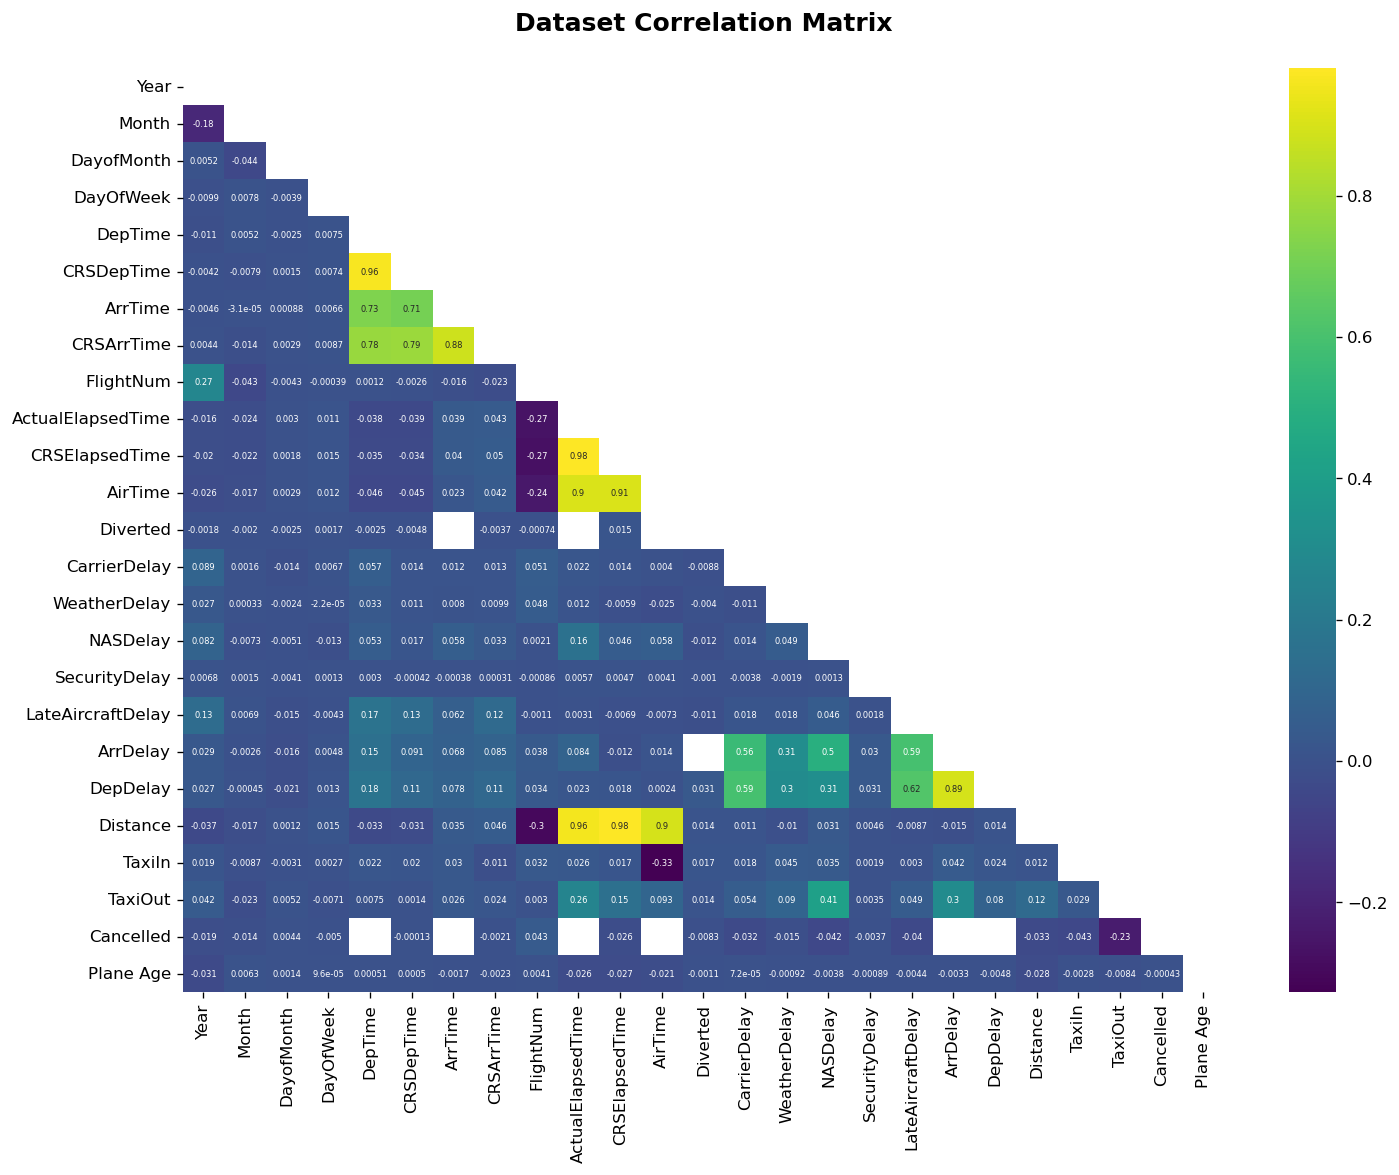

In [51]:
df_total_num = df_total_p[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime','ArrTime', 'CRSArrTime',  'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Diverted','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay','DepDelay', 'Distance', 'TaxiIn', 'TaxiOut','Cancelled','Plane Age' ]]
heatmap(df_total_num)

In [52]:
#Pearson Correlation
correlation_results = df_total_num.corrwith(df_total_num["Diverted"])
correlation_df = pd.DataFrame(correlation_results, columns=['Correlation'])
ordered_correlation_df = correlation_df.abs().sort_values(by='Correlation', ascending=False)
ordered_correlation_df

,Correlation
Diverted,1.000000
DepDelay,0.031322
TaxiIn,0.017340
CRSElapsedTime,0.015039
Distance,0.014413
TaxiOut,0.014200
NASDelay,0.011673
LateAircraftDelay,0.010971
CarrierDelay,0.008750
Cancelled,0.008280


**CONCLUSION**  
From the above corralation matrix and ordred correlation with our target 'Diverted', we made the decesion to select the top correlated numerical features to train our model on ('DepDelay','TaxiIn','CRSElapsedTime','Distance','TaxiOut','NASDelay')

### Modeling

(c) 
- For each year, fit a machine learning model for the probability of diverted US
flights using as many features as possible from attributes of the departure date,
the scheduled departure and arrival times, the coordinates and distance between
departure and planned arrival airports, and the carrier.  
- Conduct a research work on the logistic regression model and answer the
question (c ) using this model in order to compare its performance with model
that you have chosen. Visualize the coefficients across years.

In [62]:
#part_c

# List to store accuracies
accuracies = []

# List to store the models
models = {}

# List to store confusion matrices
confusion_matrices = {}

# List to store probabilities of diverted flights
probabilities = {}

# Unique years in your data
years = df_total['Year'].unique()

for year in years:
    # Filter data for the current year
    df_year = df_total[df_total['Year'] == year]
    
    # Features and target variable
    X = df_year[['DepDelay','TaxiIn','CRSElapsedTime','Distance','TaxiOut']]
    y = df_year['Diverted']
    
    # Impute NaN values with the mean
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
    
    # Create logistic regression model
    model = LogisticRegression()
    
    # Create logistic regression model
    model = LogisticRegression(max_iter=1000)  # Increase max_iter
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Store the model
    models[year] = model
    
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    # Store probabilities
    probabilities[year] = y_pred_proba
    
    # Confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[year] = cm
    
    print(f"Confusion Matrix for Year {year}:")
    print(cm)
    
     # Classification report
    print(f"Classification Report for Year {year}:")
    print(classification_report(y_test, y_pred))
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Obtain coefficients
    coefficients = model.coef_
    intercept = model.intercept_

    print("Coefficients des variables :", coefficients)
    print("Intercept :", intercept)
    
    print("Accuracy:", accuracy)
    
    # Add a line of space between the outputs for different years
    print("\n" + "="*50 + "\n")
    

Confusion Matrix for Year 1999:
[[209063      4]
 [    71    577]]
Classification Report for Year 1999:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209067
           1       0.99      0.89      0.94       648

    accuracy                           1.00    209715
   macro avg       1.00      0.95      0.97    209715
weighted avg       1.00      1.00      1.00    209715

Coefficients des variables : [[ 2.55032044e-02 -3.77342496e+01 -6.67379308e-03  7.71123775e-04
   5.17826886e-01]]
Intercept : [-4.49853157]
Accuracy: 0.9996423717902868


Confusion Matrix for Year 2000:
[[209184      7]
 [    53    471]]
Classification Report for Year 2000:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209191
           1       0.99      0.90      0.94       524

    accuracy                           1.00    209715
   macro avg       0.99      0.95      0.97    209715
weighted avg       1.

Year 1999:

Confusion Matrix:

- True Negatives (TN): 209,063
- False Positives (FP): 4
- False Negatives (FN): 71
- True Positives (TP): 577

Classification Report:

- Precision: Precision for class 0 (non-diverted flights) is 1.00, and for class 1 (diverted flights) is 0.99. This indicates the proportion of correctly predicted instances for each class.
- Recall: Recall for class 0 is 1.00, and for class 1 is 0.89. This indicates the proportion of actual positive instances that were correctly identified.
- F1-score: F1-score for class 0 is 1.00, and for class 1 is 0.94. It's the harmonic mean of precision and recall and provides a balance between them.
- Support: The number of actual occurrences of each class in the test data.

Coefficients of variables:

- TaxiIn: -37.73
- DepDelay: 0.026
- TaxiOut: 0.518
- CRSElapsedTime: -0.007
- Distance: 0.000771
- NASDelay: Coefficient not provided
- Intercept: -4.50

The logistic regression model for the year 1999 predicts the probability of flight diversion using features such as TaxiIn, DepDelay, TaxiOut, CRSElapsedTime, Distance, and NASDelay.

Analysis:

The model achieved an accuracy of 100% for the year 1999.
However, looking at the confusion matrix, it appears the model incorrectly classified 71 out of 648 diverted flights.
The F1-score for class 1 (diverted flights) is 0.94, which is reasonably high.
The coefficients indicate the impact of each feature on the prediction of flight diversion. For instance, as DepDelay increases, the log-odds of the flight being diverted increase by 0.026 units.